Notebook to analyse the results from model_de.ipynb

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

In [2]:
# Name of the folder where the results stored 
path_save_folder = '../results/world_grdc'
# Construct full file paths
nse_file_path = os.path.join(path_save_folder, 'NSE.csv')
y_obs_file_path = os.path.join(path_save_folder, 'y_obs.csv')
y_sim_file_path = os.path.join(path_save_folder, 'y_sim.csv')
# Load the CSV file into a DataFrame
df = pd.read_csv(nse_file_path)
# Load the observed and simulated streamflow data from CSV files
y_obs = pd.read_csv(y_obs_file_path, header=0, index_col=0)
y_sim = pd.read_csv(y_sim_file_path, header=0, index_col=0)

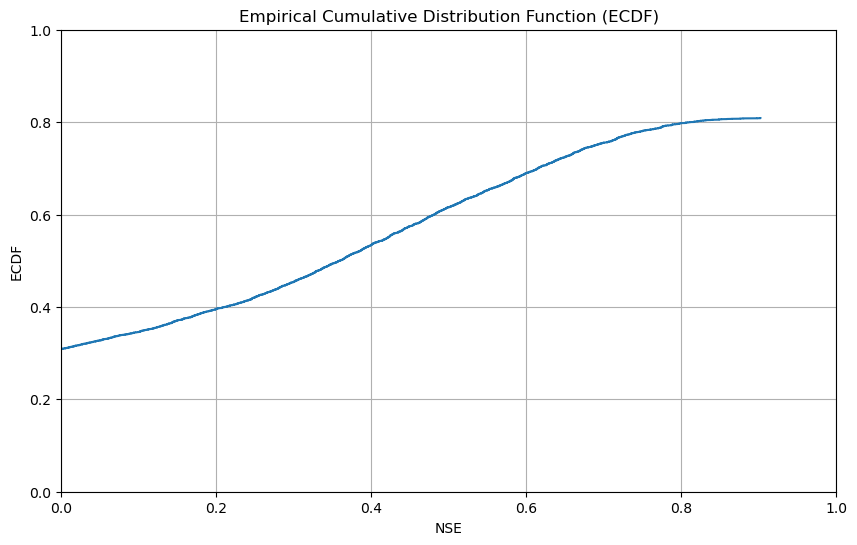

In [3]:
# Assuming df['nse'] contains your NSE values
nse_values = df['NSE'].values

# Sort the values in ascending order
sorted_nse = np.sort(nse_values)

# Calculate the cumulative probabilities
ecdf = np.arange(1, len(sorted_nse) + 1) / len(sorted_nse)

# Plot the ECDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_nse, ecdf, drawstyle='steps-post')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.xlabel('NSE')
plt.ylabel('ECDF')
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.grid(True)
plt.show()

In [4]:
# Load the second CSV file containing basin_id, lat, and lon
df2 = pd.read_csv(r"C:\Users\as2023\bwSyncShare\01_Analysis\03_Backward_Hydrology\01_Analysis\01_baseline\grdc_caravan.csv", usecols=['gauge_id', 'gauge_lat', 'gauge_lon'])

# Rename 'gauge_id' to 'basin_id' for consistency
df2.rename(columns={'gauge_id': 'basin_id'}, inplace=True)

# Merge the two dataframes based on the 'basin_id' column
merged_df = pd.merge(df, df2, on='basin_id', how='inner')

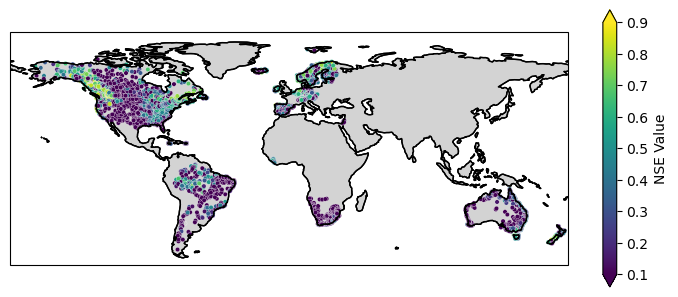

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_world_map(df, extent):
    df_cleaned = df.dropna(subset=['NSE', 'gauge_lat', 'gauge_lon'])
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    ax.set_extent(extent)

    ax.add_feature(cfeature.LAND, color='lightgray')
    ax.add_feature(cfeature.OCEAN, color='white')
    ax.add_feature(cfeature.COASTLINE)
    # Set custom limits for the colormap
    vmin = 0.1  # Minimum value for the colormap
    vmax = 0.9  # Maximum value for the colormap
    # Plot the latitude and longitude points with actual NSE values
    sc = ax.scatter(df_cleaned['gauge_lon'], df_cleaned['gauge_lat'], c=df_cleaned['NSE'], cmap='viridis', 
                    marker='o', transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, s=10, edgecolors='white', linewidths=0.2)

    # Add colorbar
    cbar = plt.colorbar(sc, ax=ax,  shrink=0.6, extend='both')
    cbar.set_label('NSE Value')

    ax.coastlines()

    plt.show()


# Manually set the latitude and longitude extent
world_extent_no_antarctica = [-180, 180, -60, 90]
larger_extent_de = [3.0, 17.0, 45.0, 56.0]

plot_world_map(merged_df, world_extent_no_antarctica)